In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Description of the dataset
The dataset is a breast cancer dataset, with a classification from 1 to 10

The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [5]:
raw_df = pd.read_csv('raw_data.csv', index_col=['ID'])

In [6]:
raw_df.head()

Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  BlandChrom  \
ID                                                                              
1000025      5         1          1        1            2       1           3   
1002945      5         4          4        5            7      10           3   
1015425      3         1          1        1            2       2           3   
1016277      6         8          8        1            3       4           3   
1017023      4         1          1        3            2       1           3   

         NormNucl  Mit  Class  
ID                             
1000025         1    1      2  
1002945         2    1      2  
1015425         1    1      2  
1016277         7    1      2  
1017023         1    1      2

In [10]:
raw_df.shape

(699, 10)

target columns -> Class
Index -> ID
['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc','BlandChrom', 'NormNucl', 'Mit'] -> features

In [12]:
raw_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

Distribution of classes or data

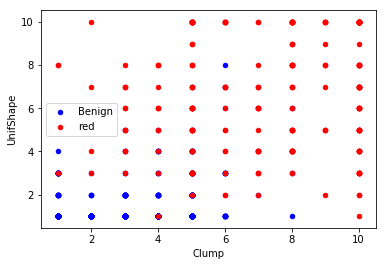

In [21]:
benign_df = raw_df[raw_df['Class']==2]
malignant_df = raw_df[raw_df['Class']==4]

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifShape', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifShape', color='red', label='red',ax=axes)

In [23]:
raw_df.dtypes

Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [27]:
final_df = raw_df[pd.to_numeric(raw_df['BareNuc'], errors='coerce').notnull()]

In [30]:
final_df['BareNuc'] = final_df['BareNuc'].astype('int64')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
final_df.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [54]:
final_df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [55]:
features = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit']
target = ['Class']

In [68]:
features_df = final_df[features]
target_df = final_df[target]

AttributeError: 'DataFrame' object has no attribute 'map'

In [57]:
X = features_df.values
Y = target_df.values

In [65]:
X.shape

(683, 9)

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [70]:
from sklearn.svm import SVC

In [71]:
classifier = SVC(C=2)

In [72]:
classifier.fit(x_train,y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
y_predict = classifier.predict(x_test)

In [80]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predict)

In [81]:
print(report)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        89
           4       0.91      1.00      0.95        48

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [82]:
import pickle

In [89]:
pickle.dump(classifier, open('classifier.pkl', 'wb'))